## OLS regression: Predicting Obesity Levels

This notebook builds an Ordinary Least Squares (OLS) regression model to predict obesity levels based on lifestyle and physical features. We first prepare the data by one-hot encoding categorical variables and mapping obesity categories into numeric values. 
The model is trained on 80% of the dataset and evaluated on the remaining 20% using MSE and R² score.

In [12]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the full cleaned dataset
data = pd.read_feather('../processed_data/obesity_cleaned.feather')

# Define target and features
target_col = "obesity_level"  # Target variable
y = data[target_col]
X = data.drop(columns=[target_col])

# List categorical columns
categorical_cols = [
    "gender", "family_history_overweight", "high_caloric_food_freq", 
    "vegetables_freq", "main_meal_count", "snacking_freq", "smokes",
    "water_intake", "calorie_tracking", "physical_activity_freq",
    "screen_time_hours", "alcohol_consumption_freq", "transport_mode"
]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Map target classes to numbers
obesity_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
y_encoded = y.map(obesity_mapping)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Train the OLS model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Predict on test set
y_pred = ols_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error (MSE): 0.1716
R2 Score: 0.9569


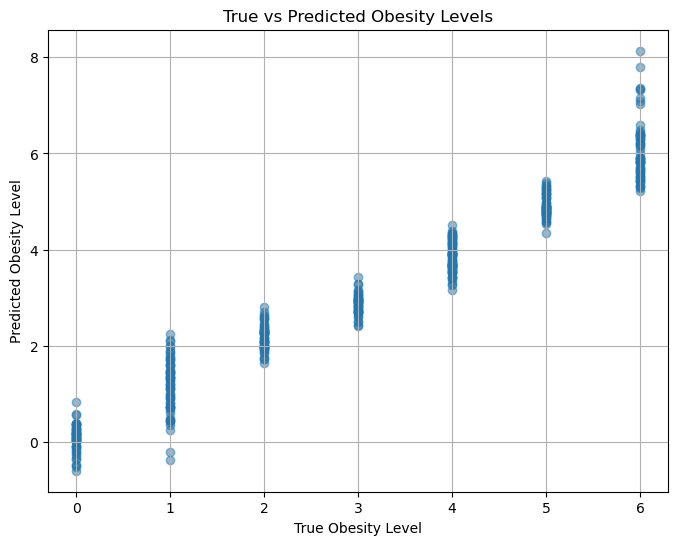

In [14]:
# Plot true values (y_test) vs. predicted values (y_pred) for quick quality check

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Obesity Level')
plt.ylabel('Predicted Obesity Level')
plt.title('True vs Predicted Obesity Levels')
plt.grid(True)
plt.show()


Comments on the plot:
- Most points are close to the diagonal line, which means that the predictions are very accurate
- Small vertical spread indicates minor prediction errors (is normal)
- No major outliers -> the model fits the data well & predicts obesity levels reliably